## Metodologia

* Dados são referentes aos registros de ocorrências de roubos,furtos e recuperação de veículos no ano de 2022 no estado do Paraná.
* Criar um algoritmo de predição através de Arvore de Decisão
* Serão analisados veículos roubados/furtados e recuperados no mesmo ano. Dessa forma, muitos recuperados no ano de 2022 contidos na base são de registros de roubos anteriores ao 2022. Assim como muitos veículos que foram roubados/furtados em 2022 podem ter sidos recuperados no ano de 2023.
* Pergunta a se responder: um veículo roubado/furtado no ano de 2022, qual a chance de ser recuperado NO MESMO  ANO DE 2022.

* Os atributos Chassi e CódigoBO aplicou-se pseudonimização, envolvendo a substituição de informações pessoais identificáveis por identificadores únicos ou pseudônimos, mantendo a
possibilidade de associar os dados a um indivíduo, mas apenas com o uso de informações adicionais, armazenadas separadamente.

In [3]:
#!pip install openpyxl
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
arquivo="furto_roubo.csv"
dfFurtoRoubo = pd.read_csv(arquivo, delimiter=";")
dfFurtoRoubo.head()

BOU_furto_roubo natureza             chassi data_hora_roubo_furto  \
0          2023123    FURTO  9INRG08YZZI417549      31/12/2022 19:00   
1          2023240    FURTO  9J2TJ4400TY020526      31/12/2022 19:30   
2          2023271    FURTO  9J2RJ2200OY609757      31/12/2022 23:50   
3          2023275    FURTO  9IMGGG33GYW023824      31/12/2022 22:00   
4          2023533    FURTO  9IK146097A5699271      31/12/2022 15:30   

           municipio  ano_veiculo  marca               modelo       cor  
0          PARANAGUA         1995     GM            KADETT GL  VERMELHA  
1  FRANCISCO BELTRAO         2021  HONDA   CB250F TWISTER CBS     PRATA  
2            MARINGA         2017  HONDA      CG 160 FAN ESDI  VERMELHA  
3            MARINGA         1994   FORD  VERSAILLES 2.0 I GL     VERDE  
4           LONDRINA         1996   FIAT         UNO MILLE EP      AZUL

In [5]:
arquivo="recuperado.csv"
dfRecuperado = pd.read_csv(arquivo, delimiter=";")
dfRecuperado['status']="RECUPERADO"
dfRecuperado.head()

natureza             chassi data_hora_recuperacao municipio_recuperacao  \
0    FURTO  9WLHJKL48RS402213      05/12/2022 09:48         FOZ DO IGUACU   
1    FURTO  9WLHKOL55KS500115      05/01/2022 16:03         FOZ DO IGUACU   
2    FURTO  9WKHJIIMES1000219      28/06/2022 15:42         FOZ DO IGUACU   
3    FURTO  SOQEJQSH712859303      10/05/2022 16:25            MEDIANEIRA   
4    FURTO  9WHHJIIZ8QH002137      11/04/2022 14:48         FOZ DO IGUACU   

  BOU_furto_roubo data_hora_roubo_furto  ano_veiculo  marca  \
0      2022901605      31/08/2022 08:30         2019    IMP   
1       202212246      04/01/2022 12:30         2013      I   
2      2022652888      25/06/2022 19:40         2020      I   
3      2021200271      22/02/2021 02:00         2017  HONDA   
4      2021913957      07/09/2021 20:00         2018  HONDA   

              modelo       cor      status  
0              HONDA  VERMELHA  RECUPERADO  
1   LEOPARD HT 250RR  VERMELHA  RECUPERADO  
2  ALEX MOTOSTAR VIP     PRETA  RECUPERADO  
3             CG 125     PRETA  RECUPERADO  
4             CG 125  VERMELHA  RECUPERADO

In [6]:
def pseudo(texto, STEP=2):
    try:
        codificacao = ""
        texto=str(texto)
        for letra in texto:
            if letra.isalpha(): 
                if letra.isupper():  
                    codificacao += chr((ord(letra) + STEP - 65) % 26 + 65)
                else:  
                    codificacao += chr((ord(letra) + STEP - 97) % 26 + 97)
            elif letra.isdigit():
                codificacao += str(int(letra)+STEP)
            else:
                codificacao+=letra    
        return codificacao        
    except Exception as err:
        print(f"Unexpected {err = }, {type(err)=}")
        raise

In [7]:
dfFurtoRoubo["chassi_fake"]=dfFurtoRoubo["chassi"].apply(pseudo)
dfRecuperado["chassi_fake"]=dfRecuperado["chassi"].apply(pseudo)


In [8]:
dfFurtoRoubo.head()

BOU_furto_roubo natureza             chassi data_hora_roubo_furto  \
0          2023123    FURTO  9INRG08YZZI417549      31/12/2022 19:00   
1          2023240    FURTO  9J2TJ4400TY020526      31/12/2022 19:30   
2          2023271    FURTO  9J2RJ2200OY609757      31/12/2022 23:50   
3          2023275    FURTO  9IMGGG33GYW023824      31/12/2022 22:00   
4          2023533    FURTO  9IK146097A5699271      31/12/2022 15:30   

           municipio  ano_veiculo  marca               modelo       cor  \
0          PARANAGUA         1995     GM            KADETT GL  VERMELHA   
1  FRANCISCO BELTRAO         2021  HONDA   CB250F TWISTER CBS     PRATA   
2            MARINGA         2017  HONDA      CG 160 FAN ESDI  VERMELHA   
3            MARINGA         1994   FORD  VERSAILLES 2.0 I GL     VERDE   
4           LONDRINA         1996   FIAT         UNO MILLE EP      AZUL   

             chassi_fake  
0   11KPTI210ABBK6397611  
1     11L4VL6622VA242748  
2    11L4TL4422QA8211979  
3    11KOIII55IAY2451046  
4  11KM3682119C781111493

In [9]:
dfFurtoRoubo.drop("chassi", axis=1, inplace=True)
dfRecuperado.drop("chassi", axis=1, inplace=True)

In [10]:
dfFurtoRoubo.head()

BOU_furto_roubo natureza data_hora_roubo_furto          municipio  \
0          2023123    FURTO      31/12/2022 19:00          PARANAGUA   
1          2023240    FURTO      31/12/2022 19:30  FRANCISCO BELTRAO   
2          2023271    FURTO      31/12/2022 23:50            MARINGA   
3          2023275    FURTO      31/12/2022 22:00            MARINGA   
4          2023533    FURTO      31/12/2022 15:30           LONDRINA   

   ano_veiculo  marca               modelo       cor            chassi_fake  
0         1995     GM            KADETT GL  VERMELHA   11KPTI210ABBK6397611  
1         2021  HONDA   CB250F TWISTER CBS     PRATA     11L4VL6622VA242748  
2         2017  HONDA      CG 160 FAN ESDI  VERMELHA    11L4TL4422QA8211979  
3         1994   FORD  VERSAILLES 2.0 I GL     VERDE    11KOIII55IAY2451046  
4         1996   FIAT         UNO MILLE EP      AZUL  11KM3682119C781111493

In [11]:
dfRecuperado.head()

natureza data_hora_recuperacao municipio_recuperacao BOU_furto_roubo  \
0    FURTO      05/12/2022 09:48         FOZ DO IGUACU      2022901605   
1    FURTO      05/01/2022 16:03         FOZ DO IGUACU       202212246   
2    FURTO      28/06/2022 15:42         FOZ DO IGUACU      2022652888   
3    FURTO      10/05/2022 16:25            MEDIANEIRA      2021200271   
4    FURTO      11/04/2022 14:48         FOZ DO IGUACU      2021913957   

  data_hora_roubo_furto  ano_veiculo  marca             modelo       cor  \
0      31/08/2022 08:30         2019    IMP              HONDA  VERMELHA   
1      04/01/2022 12:30         2013      I   LEOPARD HT 250RR  VERMELHA   
2      25/06/2022 19:40         2020      I  ALEX MOTOSTAR VIP     PRETA   
3      22/02/2021 02:00         2017  HONDA             CG 125     PRETA   
4      07/09/2021 20:00         2018  HONDA             CG 125  VERMELHA   

       status          chassi_fake  
0  RECUPERADO  11YNJLMN610TU624435  
1  RECUPERADO   11YNJMQN77MU722337  
2  RECUPERADO  11YMJLKKOGU32224311  
3  RECUPERADO  UQSGLSUJ93410711525  
4  RECUPERADO  11YJJLKKB10SJ224359

In [12]:
dfFurtoRoubo['BOU_furto_roubo'] = dfFurtoRoubo['BOU_furto_roubo'].astype(str)
dfRecuperado['BOU_furto_roubo'] = dfRecuperado['BOU_furto_roubo'].astype(str)

In [13]:
dfJoin = dfFurtoRoubo.merge(dfRecuperado[['BOU_furto_roubo', 'chassi_fake', 'data_hora_recuperacao', 'status']], on=["BOU_furto_roubo", "chassi_fake"],
                            how='left', suffixes=('_left', '_right'))


In [14]:
dfJoin.head()

BOU_furto_roubo natureza data_hora_roubo_furto          municipio  \
0         2023123    FURTO      31/12/2022 19:00          PARANAGUA   
1         2023240    FURTO      31/12/2022 19:30  FRANCISCO BELTRAO   
2         2023271    FURTO      31/12/2022 23:50            MARINGA   
3         2023275    FURTO      31/12/2022 22:00            MARINGA   
4         2023533    FURTO      31/12/2022 15:30           LONDRINA   

   ano_veiculo  marca               modelo       cor            chassi_fake  \
0         1995     GM            KADETT GL  VERMELHA   11KPTI210ABBK6397611   
1         2021  HONDA   CB250F TWISTER CBS     PRATA     11L4VL6622VA242748   
2         2017  HONDA      CG 160 FAN ESDI  VERMELHA    11L4TL4422QA8211979   
3         1994   FORD  VERSAILLES 2.0 I GL     VERDE    11KOIII55IAY2451046   
4         1996   FIAT         UNO MILLE EP      AZUL  11KM3682119C781111493   

  data_hora_recuperacao status  
0                   NaN    NaN  
1                   NaN    NaN  
2                   NaN    NaN  
3                   NaN    NaN  
4                   NaN    NaN

In [15]:
# Filtrando linhas sem correspondência
linhas_sem_correspondencia = dfJoin[dfJoin['status'].isnull()]

linhas_sem_correspondencia.head()


BOU_furto_roubo natureza data_hora_roubo_furto          municipio  \
0         2023123    FURTO      31/12/2022 19:00          PARANAGUA   
1         2023240    FURTO      31/12/2022 19:30  FRANCISCO BELTRAO   
2         2023271    FURTO      31/12/2022 23:50            MARINGA   
3         2023275    FURTO      31/12/2022 22:00            MARINGA   
4         2023533    FURTO      31/12/2022 15:30           LONDRINA   

   ano_veiculo  marca               modelo       cor            chassi_fake  \
0         1995     GM            KADETT GL  VERMELHA   11KPTI210ABBK6397611   
1         2021  HONDA   CB250F TWISTER CBS     PRATA     11L4VL6622VA242748   
2         2017  HONDA      CG 160 FAN ESDI  VERMELHA    11L4TL4422QA8211979   
3         1994   FORD  VERSAILLES 2.0 I GL     VERDE    11KOIII55IAY2451046   
4         1996   FIAT         UNO MILLE EP      AZUL  11KM3682119C781111493   

  data_hora_recuperacao status  
0                   NaN    NaN  
1                   NaN    NaN  
2                   NaN    NaN  
3                   NaN    NaN  
4                   NaN    NaN

In [16]:
linhas_correspondencia = dfJoin[dfJoin['status'].notna()]
linhas_correspondencia.head()

BOU_furto_roubo natureza data_hora_roubo_furto           municipio  \
45        202316492    FURTO      29/12/2022 16:00            CASCAVEL   
151         2022532    FURTO      01/01/2022 00:01  CRUZEIRO DO IGUACU   
152         2022658    FURTO      01/01/2022 01:00       ITAUNA DO SUL   
154         2022712    FURTO      01/01/2022 05:00  ALTAMIRA DO PARANA   
155        20221096    FURTO      01/01/2022 03:00        ITAIPULANDIA   

     ano_veiculo   marca              modelo       cor           chassi_fake  \
45          2012  YAMAHA     FACTOR YBR125 K  VERMELHA   11L8TN3742L22118973   
151         1995      VW         GOL GLI 1.8  FANTASIA    11KFIII599BC257394   
152         2012   HONDA      NXR150 BROS ES  FANTASIA  11L4TM2772LA75711911   
154         2010    FIAT  UNO MILLE WAY ECON  VERMELHA  11KM371066JJ85510859   
155         1993      GM        MONZA SL EFI      AZUL   11KPSP33PYWK2321182   

    data_hora_recuperacao      status  
45       21/12/2022 20:24  RECUPERADO  
151      26/01/2022 15:00  RECUPERADO  
152      23/02/2022 12:09  RECUPERADO  
154      22/03/2022 12:16  RECUPERADO  
155      06/01/2022 14:42  RECUPERADO

In [17]:
dfJoin['status']=dfJoin['status'].fillna('NAO_RECUPERADO')

In [18]:
dfJoin.head()

BOU_furto_roubo natureza data_hora_roubo_furto          municipio  \
0         2023123    FURTO      31/12/2022 19:00          PARANAGUA   
1         2023240    FURTO      31/12/2022 19:30  FRANCISCO BELTRAO   
2         2023271    FURTO      31/12/2022 23:50            MARINGA   
3         2023275    FURTO      31/12/2022 22:00            MARINGA   
4         2023533    FURTO      31/12/2022 15:30           LONDRINA   

   ano_veiculo  marca               modelo       cor            chassi_fake  \
0         1995     GM            KADETT GL  VERMELHA   11KPTI210ABBK6397611   
1         2021  HONDA   CB250F TWISTER CBS     PRATA     11L4VL6622VA242748   
2         2017  HONDA      CG 160 FAN ESDI  VERMELHA    11L4TL4422QA8211979   
3         1994   FORD  VERSAILLES 2.0 I GL     VERDE    11KOIII55IAY2451046   
4         1996   FIAT         UNO MILLE EP      AZUL  11KM3682119C781111493   

  data_hora_recuperacao          status  
0                   NaN  NAO_RECUPERADO  
1                   NaN  NAO_RECUPERADO  
2                   NaN  NAO_RECUPERADO  
3                   NaN  NAO_RECUPERADO  
4                   NaN  NAO_RECUPERADO

In [19]:
dfJoin['data_hora_roubo_furto'] = pd.to_datetime(
    dfJoin['data_hora_roubo_furto'], format='%d/%m/%Y %H:%M')
dfJoin['data_hora_recuperacao'] = pd.to_datetime(
    dfJoin['data_hora_recuperacao'], format='%d/%m/%Y %H:%M')

# Calcular a diferença em dias e lidar com valores nulos
dfJoin['diferenca_em_dias'] = (
    dfJoin['data_hora_recuperacao'] - dfJoin['data_hora_roubo_furto']).dt.days
dfJoin.loc[dfJoin['diferenca_em_dias'].isnull(), 'diferenca_em_dias'] = -1


dfJoin.head()

BOU_furto_roubo natureza data_hora_roubo_furto          municipio  \
0         2023123    FURTO   2022-12-31 19:00:00          PARANAGUA   
1         2023240    FURTO   2022-12-31 19:30:00  FRANCISCO BELTRAO   
2         2023271    FURTO   2022-12-31 23:50:00            MARINGA   
3         2023275    FURTO   2022-12-31 22:00:00            MARINGA   
4         2023533    FURTO   2022-12-31 15:30:00           LONDRINA   

   ano_veiculo  marca               modelo       cor            chassi_fake  \
0         1995     GM            KADETT GL  VERMELHA   11KPTI210ABBK6397611   
1         2021  HONDA   CB250F TWISTER CBS     PRATA     11L4VL6622VA242748   
2         2017  HONDA      CG 160 FAN ESDI  VERMELHA    11L4TL4422QA8211979   
3         1994   FORD  VERSAILLES 2.0 I GL     VERDE    11KOIII55IAY2451046   
4         1996   FIAT         UNO MILLE EP      AZUL  11KM3682119C781111493   

  data_hora_recuperacao          status  diferenca_em_dias  
0                   NaT  NAO_RECUPERADO               -1.0  
1                   NaT  NAO_RECUPERADO               -1.0  
2                   NaT  NAO_RECUPERADO               -1.0  
3                   NaT  NAO_RECUPERADO               -1.0  
4                   NaT  NAO_RECUPERADO               -1.0

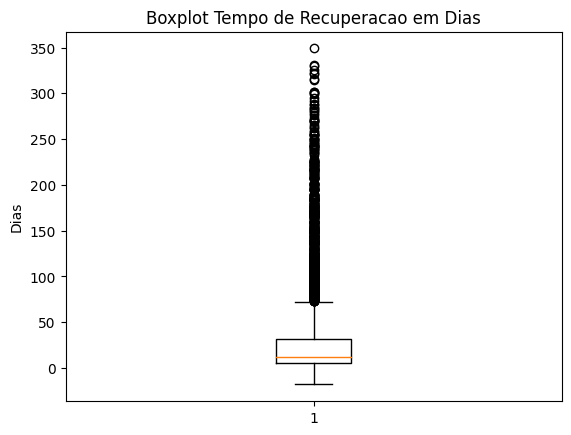

In [20]:
df_filtrado = dfJoin[dfJoin['diferenca_em_dias'] != -1]

# Plotar o gráfico boxplot
plt.boxplot(df_filtrado['diferenca_em_dias'])
plt.ylabel('Dias')
plt.title('Boxplot Tempo de Recuperacao em Dias')
plt.show()


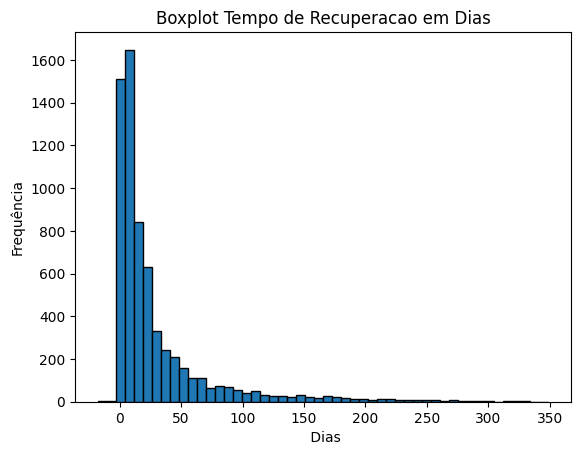

In [21]:
# Plotar o histograma
plt.hist(df_filtrado['diferenca_em_dias'], bins=50, edgecolor='black')
plt.xlabel(' Dias')
plt.ylabel('Frequência')
plt.title('Boxplot Tempo de Recuperacao em Dias')
plt.show()


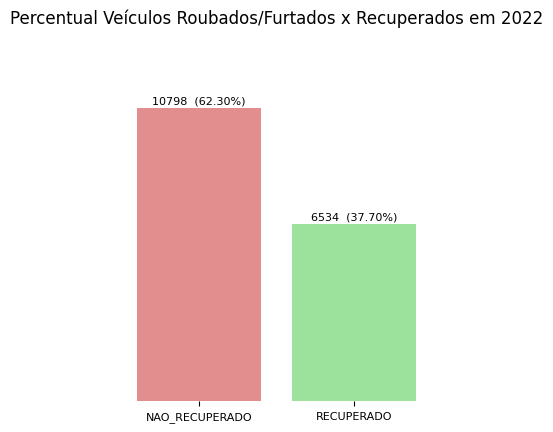

In [22]:
palette = ['lightcoral', 'lightgreen']
categorias_contagem = dfJoin['status'].value_counts()

total = categorias_contagem.sum()
categorias_percentuais = (categorias_contagem / total) * 100

plt.figure(figsize=(4,4))
ax = sns.barplot(x=categorias_contagem.index,
                 y=categorias_contagem.values, palette=palette)
plt.xlabel('Veículos')
plt.ylabel('Contagem')
plt.title('Percentual Veículos Roubados/Furtados x Recuperados em 2022', pad=50)

for i, p in enumerate(ax.patches):
    percentual = f'{categorias_percentuais.values[i]:.2f}%'
    total_categoria = f'{categorias_contagem.values[i]}'
    ax.annotate(f'{total_categoria}  ({percentual})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_yticks([])  # Remove o eixo y com os valores

# Remover elementos visuais extras
sns.despine(trim=True, left=True, bottom=True)
ax.set_ylabel('')  # Remove a legenda do eixo y
ax.set_xlabel('')  # Remove a legenda do eixo y
ax.tick_params(axis='x', labelsize=8)

# Remove as bordas do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

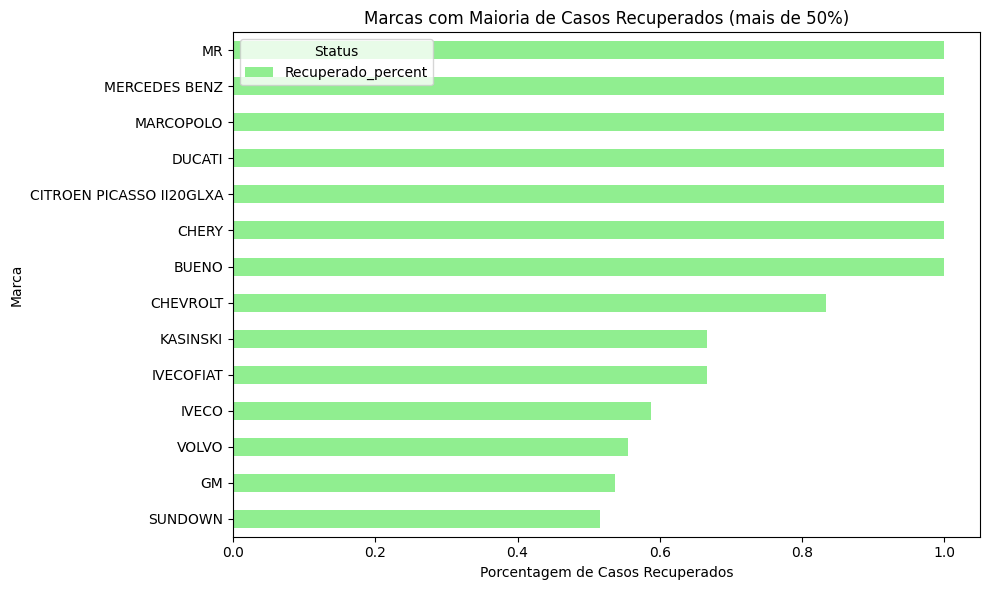

In [23]:
df = dfJoin
status_counts = dfJoin.groupby(
    ['marca', 'status']).size().unstack(fill_value=0)

# Calcular a porcentagem de casos recuperados para cada marca
status_counts['Recuperado_percent'] = status_counts['RECUPERADO'] / \
    status_counts.sum(axis=1)

# Filtrar apenas as marcas onde a porcentagem de "Recuperado" é maior que 50%
recovered_majority = status_counts[status_counts['Recuperado_percent'] > 0.5]

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
recovered_majority['Recuperado_percent'].sort_values().plot(
    kind='barh', color='lightgreen')
plt.title('Marcas com Maioria de Casos Recuperados (mais de 50%)')
plt.xlabel('Porcentagem de Casos Recuperados')
plt.ylabel('Marca')
plt.tight_layout()



plt.legend(title='Status', loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

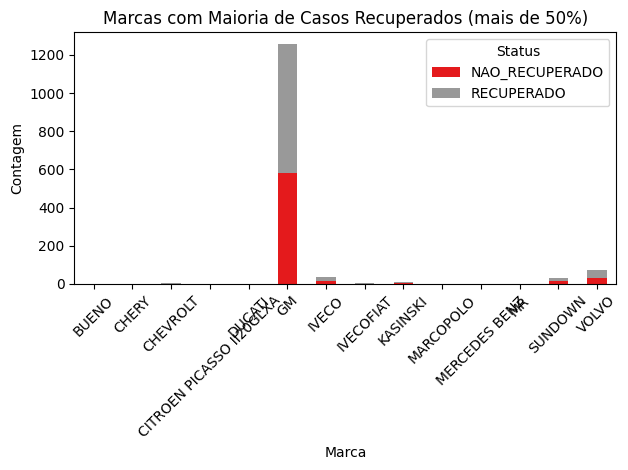

In [24]:

# Calcular a contagem de cada status por marca
status_counts = dfJoin.groupby(
    ['marca', 'status']).size().unstack(fill_value=0)

# Calcular a porcentagem de casos recuperados para cada marca
status_counts['Recuperado_percent'] = status_counts['RECUPERADO'] / \
    status_counts.sum(axis=1)

# Filtrar apenas as marcas onde a porcentagem de "Recuperado" é maior que 50%
recovered_majority = status_counts[status_counts['Recuperado_percent'] > 0.5]

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
recovered_majority.drop('Recuperado_percent', axis=1).plot(
    kind='bar', stacked=True, colormap='Set1')
plt.title('Marcas com Maioria de Casos Recuperados (mais de 50%)')
plt.xlabel('Marca')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()


In [25]:
dfJoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17332 entries, 0 to 17331
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   BOU_furto_roubo        17332 non-null  object        
 1   natureza               17332 non-null  object        
 2   data_hora_roubo_furto  17332 non-null  datetime64[ns]
 3   municipio              17332 non-null  object        
 4   ano_veiculo            17332 non-null  int64         
 5   marca                  17332 non-null  object        
 6   modelo                 17332 non-null  object        
 7   cor                    17332 non-null  object        
 8   chassi_fake            17332 non-null  object        
 9   data_hora_recuperacao  6534 non-null   datetime64[ns]
 10  status                 17332 non-null  object        
 11  diferenca_em_dias      17332 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory

In [26]:
pd.set_option('display.max_rows', None)


In [27]:
df = dfJoin['marca'].value_counts()
df


marca
HONDA                               5078
VW                                  2747
FIAT                                1833
I                                   1467
GM                                  1256
FORD                                 835
CHEVROLET                            571
YAMAHA                               502
RENAULT                              395
IMP                                  348
HYUNDAI                              280
REB                                  262
SR                                   201
CHEV                                 170
TOYOTA                               162
SCANIA                               132
PEUGEOT                              115
M.BENZ                               112
NISSAN                               107
JTA                                  100
JEEP                                  87
MMC                                   85
CITROEN                               85
R                                     79
VOLVO     

In [28]:
pd.set_option('display.max_rows', 20)

In [29]:
dfJoin['marca'] = dfJoin['marca'].replace('CHEVROLT', 'CHEVROLET')
dfJoin['marca'] = dfJoin['marca'].replace('IMP', 'IMPORTADO')
dfJoin['marca'] = dfJoin['marca'].replace('I', 'IMPORTADO')

In [30]:
dfJoin = dfJoin[~dfJoin['marca'].str.contains('NÃO IDENTIFICADO')]


In [31]:
pd.set_option('display.max_rows', None)
df = dfJoin['marca'].value_counts()
df
pd.set_option('display.max_rows', 10)


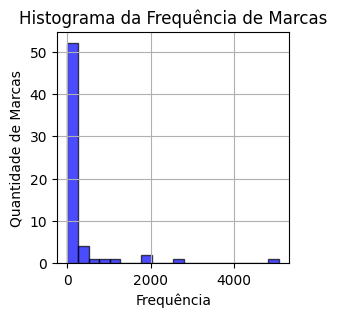

In [32]:
plt.figure(figsize=(3, 3))
plt.hist(df, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Frequência')
plt.ylabel('Quantidade de Marcas')
plt.title('Histograma da Frequência de Marcas')
plt.grid(True)
plt.show()


In [33]:
marca_counts = dfJoin['marca'].value_counts()
valores_abaixo_de_10 = marca_counts[marca_counts < 10].index

# Renomear os valores abaixo de 10 para "Outros"
#dfJoin['marca'] = dfJoin['marca'].apply(
#    lambda x: 'Outros' if x in valores_abaixo_de_10 else x)
dfJoin.loc[dfJoin['marca'].isin(valores_abaixo_de_10), 'marca'] = 'OUTROS'

In [34]:
pd.set_option('display.max_rows', None)
df = dfJoin['marca'].value_counts()
df

marca
HONDA        5078
VW           2747
FIAT         1833
IMPORTADO    1815
GM           1256
FORD          835
CHEVROLET     577
YAMAHA        502
RENAULT       395
HYUNDAI       280
REB           262
SR            201
CHEV          170
TOYOTA        162
SCANIA        132
PEUGEOT       115
M.BENZ        112
NISSAN        107
JTA           100
JEEP           87
CITROEN        85
OUTROS         85
MMC            85
R              79
VOLVO          72
IVECO          34
SUNDOWN        31
DAFRA          30
BMW            19
AUDI           15
M.A.           13
KAWASAKI       13
Name: count, dtype: int64

In [35]:
num_classes = 5

dfJoin['classes'] = pd.qcut(dfJoin['ano_veiculo'], q=num_classes, labels=[
                        f'Classe {i+1}' for i in range(num_classes)])


In [36]:
dfJoin['classes'].value_counts()

classes
Classe 1    3784
Classe 4    3671
Classe 2    3442
Classe 3    3257
Classe 5    3173
Name: count, dtype: int64

In [37]:
dfJoin['cor'].value_counts()


cor
BRANCA              4017
PRETA               3173
VERMELHA            2595
PRATA               2354
CINZA               1595
AZUL                1355
ROSA                 601
FANTASIA             557
VERDE                516
BEGE                 175
AMARELA              136
NÃO IDENTIFICADO      64
MARROM                62
LARANJA               55
ROXA                  44
DOURADA               26
GRENA                  2
Name: count, dtype: int64

In [38]:
pd.set_option('display.max_rows', 10)
dfJoin['data_hora_roubo_furto'] = pd.to_datetime(
    dfJoin['data_hora_roubo_furto'], format='%d/%m/%Y %H:%M')

# Criar uma nova coluna 'mes' baseada no mês da coluna 'data'
dfJoin['mes'] = dfJoin['data_hora_roubo_furto'].dt.month
dfJoin

BOU_furto_roubo natureza data_hora_roubo_furto          municipio  \
0             2023123    FURTO   2022-12-31 19:00:00          PARANAGUA   
1             2023240    FURTO   2022-12-31 19:30:00  FRANCISCO BELTRAO   
2             2023271    FURTO   2022-12-31 23:50:00            MARINGA   
3             2023275    FURTO   2022-12-31 22:00:00            MARINGA   
4             2023533    FURTO   2022-12-31 15:30:00           LONDRINA   
...               ...      ...                   ...                ...   
17327     20221370119    FURTO   2022-12-31 18:00:00             CANDOI   
17328     20221370276    FURTO   2022-12-31 17:50:00           MATINHOS   
17329     20221370321    FURTO   2022-12-31 17:50:00          PARANAGUA   
17330     20221370611    FURTO   2022-12-31 22:00:00    SIQUEIRA CAMPOS   
17331     20221370630    FURTO   2022-12-31 20:00:00      ITAUNA DO SUL   

       ano_veiculo      marca                 modelo       cor  \
0             1995         GM              KADETT GL  VERMELHA   
1             2021      HONDA     CB250F TWISTER CBS     PRATA   
2             2017      HONDA        CG 160 FAN ESDI  VERMELHA   
3             1994       FORD    VERSAILLES 2.0 I GL     VERDE   
4             1996       FIAT           UNO MILLE EP      AZUL   
...            ...        ...                    ...       ...   
17327         2009       FIAT      UNO MILLE ECONOMY  VERMELHA   
17328         2010  IMPORTADO  HYUNDAI TUCSON GL 20L     PRETA   
17329         1996         VW              GOL 1000I     PRETA   
17330         2006     YAMAHA            FAZER YS250  VERMELHA   
17331         2021       FIAT      ARGO TREKKING 1.3    BRANCA   

                 chassi_fake data_hora_recuperacao          status  \
0       11KPTI210ABBK6397611                   NaT  NAO_RECUPERADO   
1         11L4VL6622VA242748                   NaT  NAO_RECUPERADO   
2        11L4TL4422QA8211979                   NaT  NAO_RECUPERADO   
3        11KOIII55IAY2451046                   NaT  NAO_RECUPERADO   
4      11KM3682119C781111493                   NaT  NAO_RECUPERADO   
...                      ...                   ...             ...   
17327  11KM371024J1184310393                   NaT  NAO_RECUPERADO   
17328    TVQSV103KJJD3102638                   NaT  NAO_RECUPERADO   
17329  11KFIII599BC310371010                   NaT  NAO_RECUPERADO   
17330    11L8TP2392822234511                   NaT  NAO_RECUPERADO   
17331    11KM5710J9QVHU24579                   NaT  NAO_RECUPERADO   

       diferenca_em_dias   classes  mes  
0                   -1.0  Classe 1   12  
1                   -1.0  Classe 5   12  
2                   -1.0  Classe 4   12  
3                   -1.0  Classe 1   12  
4                   -1.0  Classe 1   12  
...                  ...       ...  ...  
17327               -1.0  Classe 3   12  
17328               -1.0  Classe 3   12  
17329               -1.0  Classe 1   12  
17330               -1.0  Classe 2   12  
17331               -1.0  Classe 5   12  

[17327 rows x 14 columns]

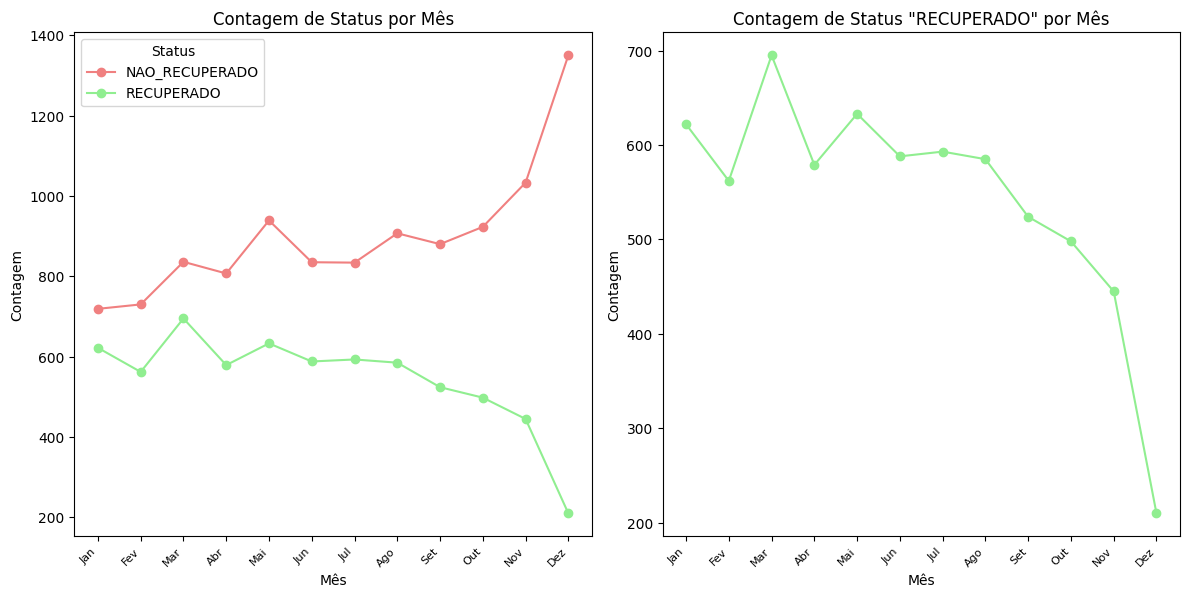

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
palette = ['lightcoral', 'lightgreen']
colors = ['lightcoral', 'lightgreen']

# Converter a coluna 'data' para datetime
dfJoin['data_hora_roubo_furto'] = pd.to_datetime(
    dfJoin['data_hora_roubo_furto'], format='%d/%m/%Y %H:%M')

# Criar uma nova coluna 'mes' baseada no mês da coluna 'data'
dfJoin['mes'] = dfJoin['data_hora_roubo_furto'].dt.month

# Criar um DataFrame pivot para contar os status por mês
pivot_dfJoin = dfJoin.pivot_table(index='mes', columns='status',
                          aggfunc='size', fill_value=0)

# Configurar subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotar o primeiro gráfico no primeiro subplot
pivot_dfJoin.plot(kind='line', marker='o', ax=axs[0], color=colors)
axs[0].set_xlabel('Mês')
axs[0].set_ylabel('Contagem')
axs[0].set_title('Contagem de Status por Mês')
axs[0].legend(title='Status')

# Filtrar o DataFrame para mostrar apenas um valor de status
filtro_status = 'RECUPERADO'
dfJoin_filtrado = dfJoin[dfJoin['status'] == filtro_status]

# Criar um DataFrame pivot para contar o status filtrado por mês
pivot_dfJoin_filtrado = dfJoin_filtrado.pivot_table(index='mes', aggfunc='size')

# Plotar o segundo gráfico no segundo subplot
pivot_dfJoin_filtrado.plot(kind='line', marker='o', ax=axs[1], color=colors[1])
axs[1].set_xlabel('Mês')
axs[1].set_ylabel('Contagem')
axs[1].set_title(f'Contagem de Status "{filtro_status}" por Mês')

# Ajustar o layout para evitar sobreposição de rótulos e títulos
plt.tight_layout()

# Definir os rótulos dos meses
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Definir a posição dos rótulos dos meses e ajustar o espaçamento
axs[0].set_xticks(pivot_dfJoin.index)
axs[0].set_xticklabels(meses, rotation=45, ha='right')
#axs[0].xaxis.set_major_locator(plt.MaxNLocator(nbins=len(pivot_df.index)))

# Mostrar todos os meses no eixo x
axs[0].set_xticks(pivot_dfJoin.index)
axs[0].set_xticklabels(meses, rotation=45, ha='right')
axs[1].set_xticks(pivot_dfJoin.index)
axs[1].set_xticklabels(meses, rotation=45, ha='right')

axs[0].tick_params(axis='x', rotation=45, labelsize=8)
axs[1].tick_params(axis='x', rotation=45, labelsize=8)

# Mostrar os gráficos
plt.show()


## ajustan do modelo

In [40]:
pd.set_option('display.max_rows', 10)
df = dfJoin['modelo'].value_counts()
df

modelo
CG 160 FAN         459
CG 160 START       341
GOL SPECIAL        312
CG 150 TITAN KS    297
CORSA WIND         294
                  ... 
FIESTA 16SEL AT      1
NISSAN               1
TOYOTA 4RUNNER       1
TIGER EXPLORER       1
206 SOLEIL 16        1
Name: count, Length: 2701, dtype: int64

In [ ]:
dfJoin['modelo_simplificado'] = dfJoin['modelo'].str.split().str[0]
pd.set_option('display.max_rows', None)
dfJoin['modelo_simplificado'].value_counts()


In [47]:
df_filtrado = dfJoin[dfJoin['modelo'].str.contains(
    'CHEVROLET', case=False)]

print(df_filtrado['modelo'])


194              CHEVROLET D20
412              CHEVROLET D20
658         CHEVROLET AGILE LT
659               CHEVROLET 60
739         CHEVROLET AGILE LT
1005     CHEVROLET D20 CUSTOML
1221       CHEVROLET AGILE LTZ
1578                 CHEVROLET
1635      CHEVROLET A20 CUSTOM
2086     CHEVROLET C20 CUSTOMS
2426       CHEVROLET AGILE LTZ
2605              CHEVROLET 10
3358           CHEVROLET C6503
3623             CHEVROLET D20
3685      CHEVROLET CLASSIC LS
3754      CHEVROLET D20 CUSTOM
3840        CHEVROLET D10/1000
4018     CHEVROLET D20 CUSTOML
4075       CHEVROLET AGILE LTZ
4332       CHEVROLET AGILE LTZ
4635       CHEVROLET AGILE LTZ
5310     CHEVROLET D20 CUSTOML
5791             CHEVROLET D40
6107             CHEVROLET D10
6112       CHEVROLET AGILE LTZ
6259        CHEVROLET AGILE LT
6326      CHEVROLET D20 CUSTOM
6449       CHEVROLET AGILE LTZ
6667             CHEVROLET D40
6690     CHEVROLET D20 CUSTOML
7316      CHEVROLET CLASSIC LS
7348             CHEVROLET D20
7370    

In [43]:
def simplificar_modelo(row):
    palavras = row['modelo'].split()
    if len(palavras) >= 2 and any(keyword in palavras for keyword in ['CHEVROLET', 'RENAULT', 'CITROEN', 'NISSAN', 'TOYOTA', 'VW']):
       # return palavras[1].strip()
        return ' '.join(palavras[:2]).strip()
    else:
        return  palavras[0]# row['modelo']
 
  
dfJoin['modelo_simplificado'] = dfJoin.apply(simplificar_modelo, axis=1)


In [44]:
dfJoin['modelo_simplificado'].value_counts()


modelo_simplificado
CG                    2899
GOL                   1530
UNO                    819
CORSA                  517
C100                   411
TOYOTA HILUX           357
BIZ                    331
PALIO                  302
S10                    289
ONIX                   268
KA                     240
FORD                   218
CBX                    185
STRADA                 179
XRE                    178
SAVEIRO                171
HB20                   170
CB                     163
RANDON                 161
CG150                  144
PARATI                 136
YBR                    133
VOYAGE                 132
SANDERO                131
NXR160                 128
FIESTA                 126
MONZA                  126
NOVO                   119
KADETT                 116
CELTA                  116
NXR150                 112
ARGO                   109
VW AMAROK              105
FIAT                   102
CB250F                 101
SUZUKI                 100
FOX     

### Arvore de decisao

In [45]:
# Pacotes de modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree



In [46]:
import graphviz

from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
#!conda install python-graphviz --yes

In [ ]:
# Target (variável resposta)
y = dfJoin['status']

# Features (variáveis explicativas)
x = dfJoin[['natureza',	'ano_veiculo',	'marca','cor']]

In [ ]:
X_encoded = pd.get_dummies(x, columns=['natureza',	'marca'	,'cor'])
#Y_encoded = pd.get_dummies(y, columns=['status'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
modelo = DecisionTreeClassifier(random_state=42, max_depth=3,  min_samples_split = 2, min_samples_leaf = 1)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
accuracy = modelo.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.64


In [ ]:
previsoes = modelo.predict(X_encoded)


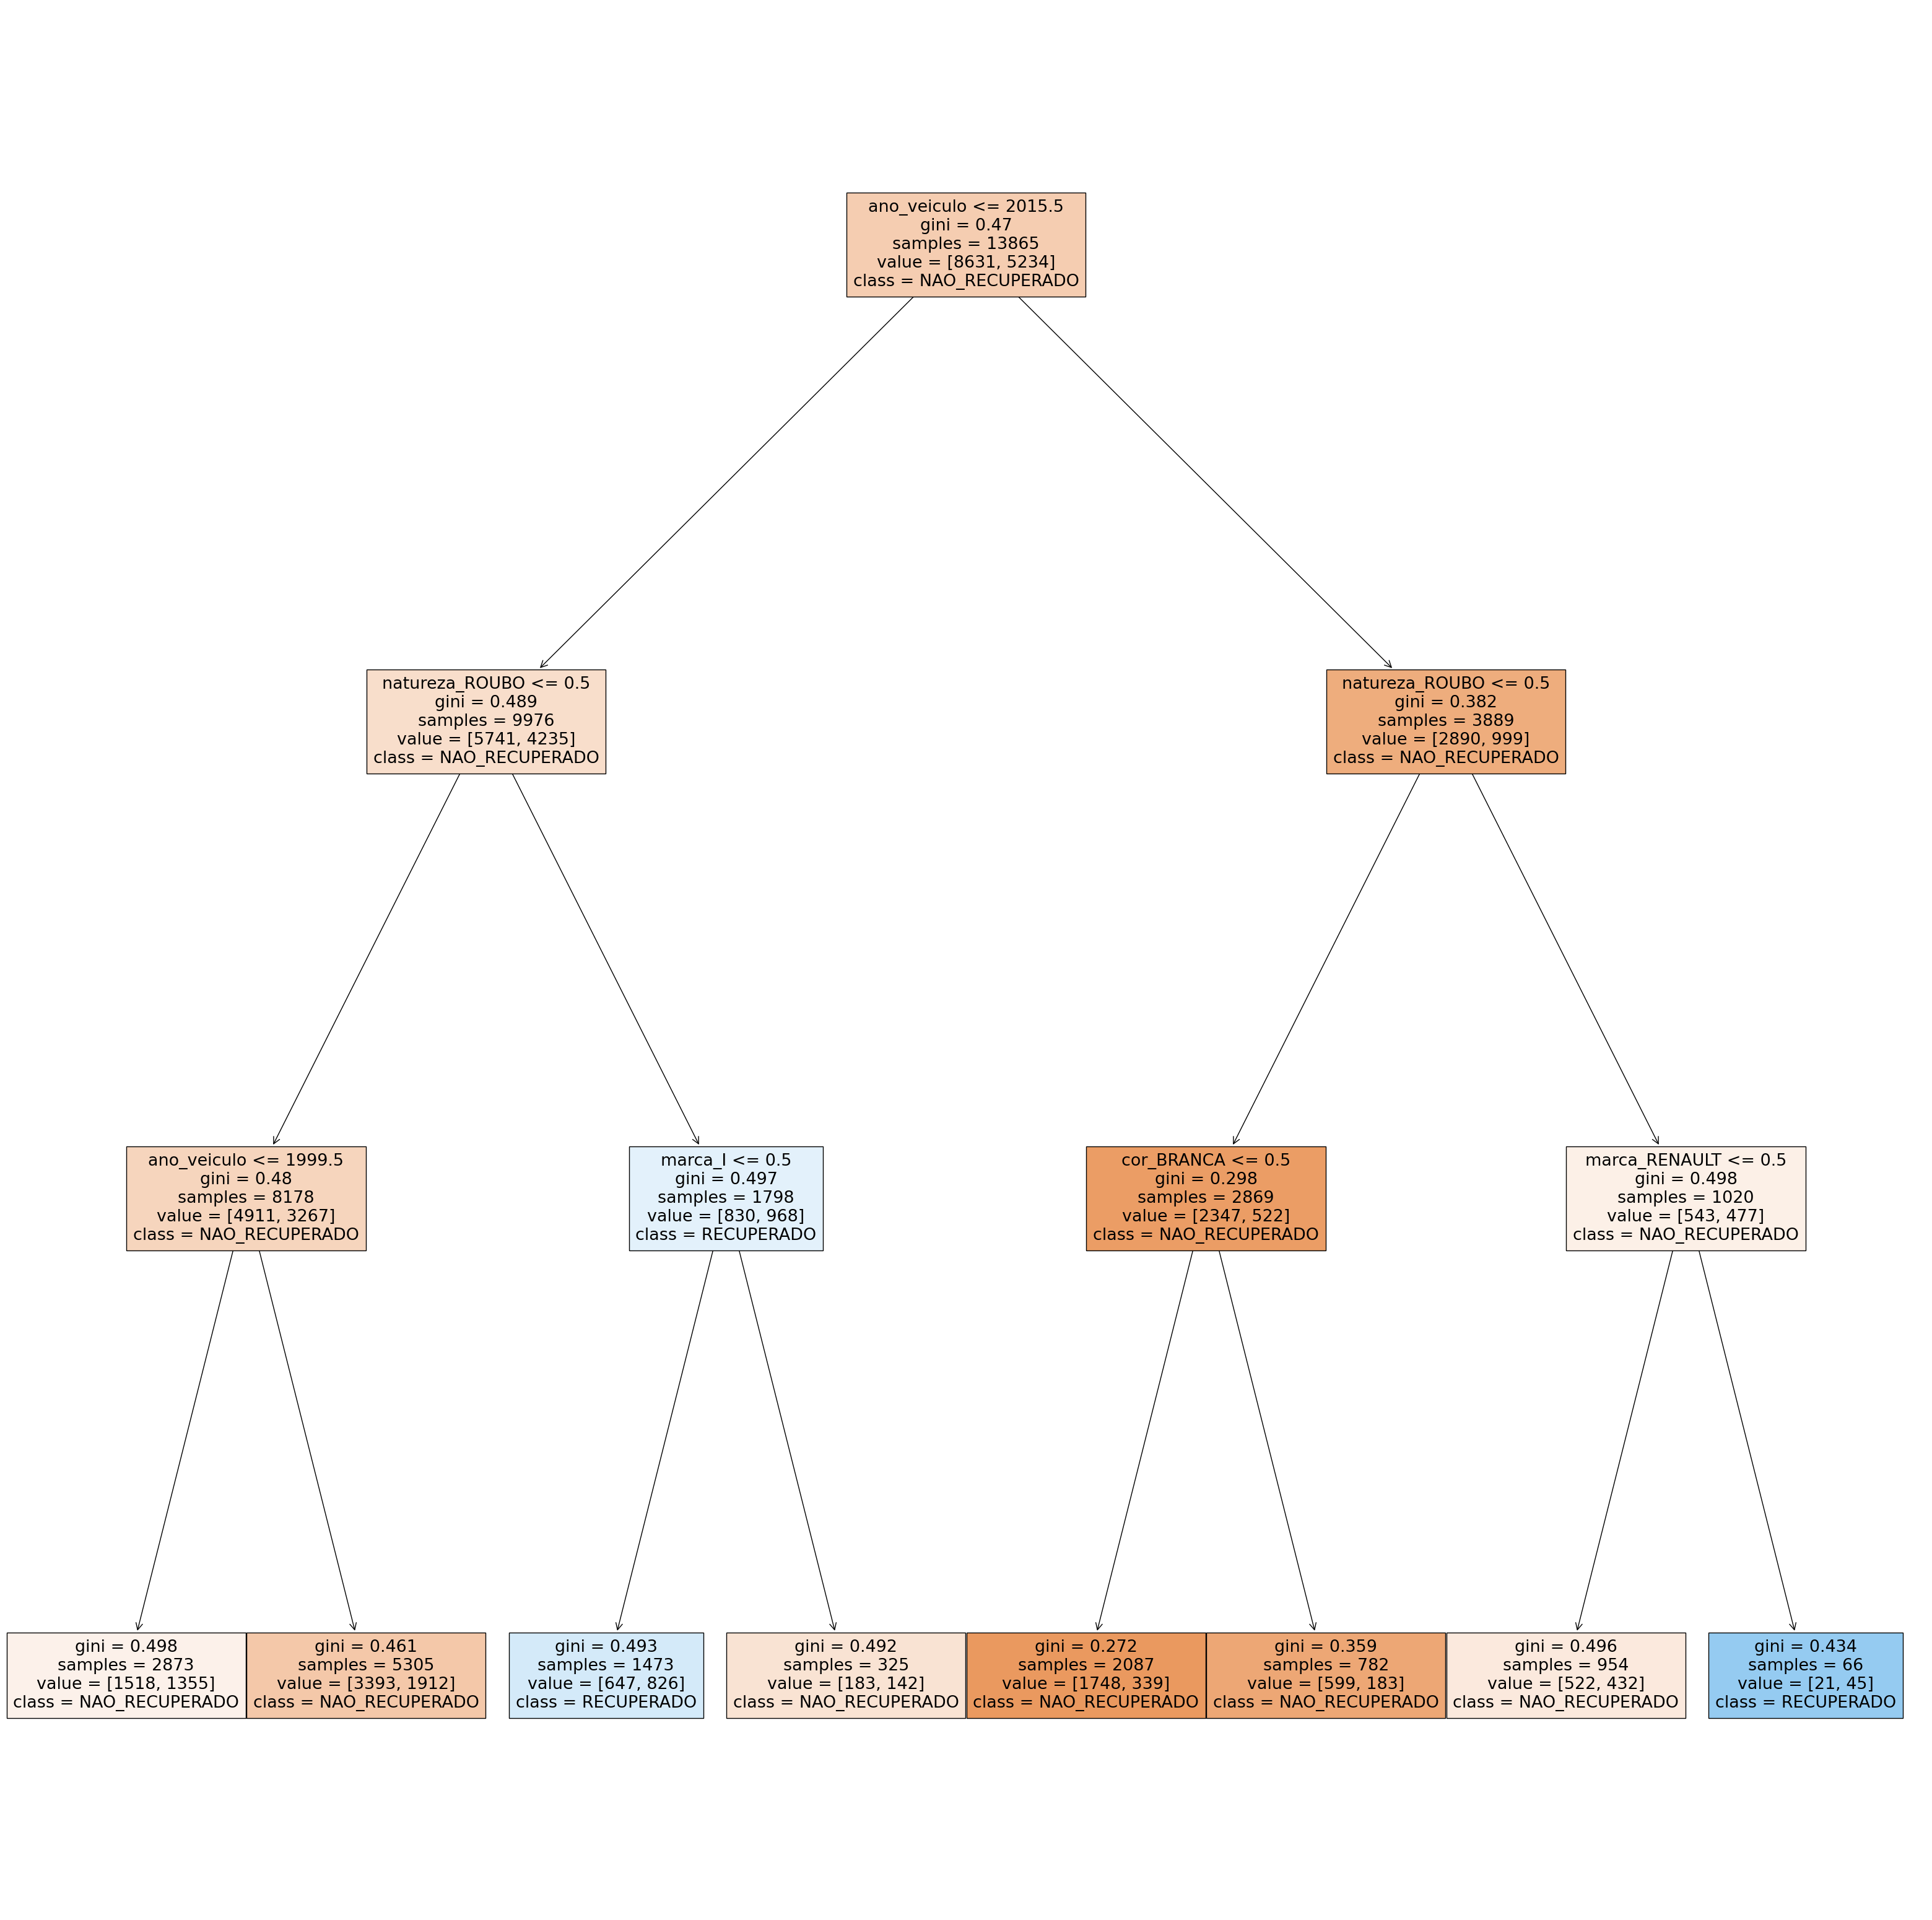

In [ ]:
# Visualização da árvore de decisão
# Visualização da árvore de decisão
class_names = ['NAO_RECUPERADO', 'RECUPERADO']
plt.figure(figsize=(40, 40))
plot_tree(modelo, feature_names=X_encoded.columns.tolist(), class_names=class_names, filled=True)
plt.show()


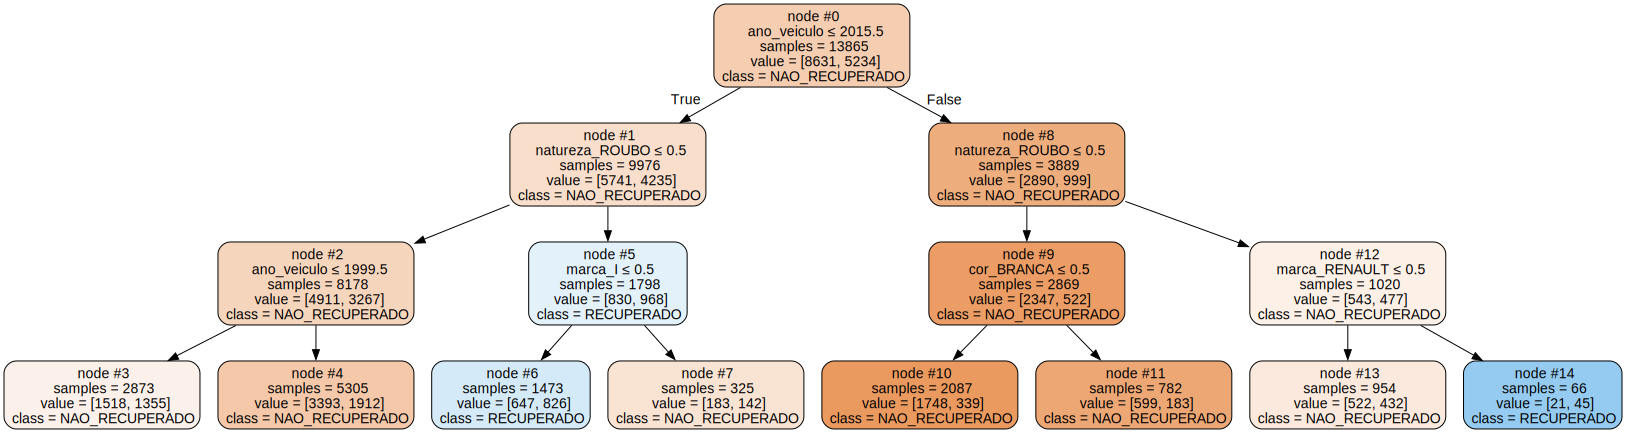

In [ ]:
export_graphviz(modelo,
                feature_names=list(X_encoded.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(y.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph)

In [ ]:
from dtreeviz import dtreeviz

class_names = ['NAO_RECUPERADO', 'RECUPERADO']
features = list(X_encoded.columns)
viz = dtreeviz(modelo,
               X_encoded, y, 
               target_name=class_names,Å
               feature_names=features,
              
               scale=2.0)
viz.save("tree_visualization.svg")

/var/folders/gx/j2trdbm552v7n23p8nyr_xjc0000gn/T/ipykernel_12424/1195254118.py:5: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

In [ ]:
#!pip install dtreeviz but

In [ ]:
from dtreeviz.trees import *
import graphviz

In [ ]:
viz = dtreeviz(
    modelo,
    X_train,
    y_train,
    feature_names=X_encoded.columns,
    target_name='status',
    class_names=list(y.unique()),  # Substitua pelo nome das classes
    fancy=True  # Use o estilo visual "fancy"
)

viz.save('arvore_decisao.svg')  # Salvar a visualização em um arquivo SVG
viz.view()  # Abrir a visualização no seu visualizador de imagem padrão


/var/folders/gx/j2trdbm552v7n23p8nyr_xjc0000gn/T/ipykernel_12424/2959755230.py:1: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

In [ ]:

# Criar a visualização da árvore de decisão
viz = dtreeviz(
    modelo,
    X_train,
    y,
    feature_names=X_encoded.columns,
    target_name='status',
    class_names=list(y.unique()),  # Substitua pelo nome das classes
    fancy=True  # Use o estilo visual "fancy"
)

# Salvar a visualização em um arquivo SVG
viz.save('arvore_decisao.svg')

# Visualizar a visualização no seu visualizador padrão
viz.view()


/var/folders/gx/j2trdbm552v7n23p8nyr_xjc0000gn/T/ipykernel_12424/2794183252.py:2: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

In [ ]:



import pandas as pd
from sklearn import preprocessing, tree


Things = {'Feature01': [3,4,5,0], 
          'Feature02': [4,5,6,0], 
          'Feature03': [1,2,3,8], 
          'Target01': ['Red','Blue','Teal','Red']}
df = pd.DataFrame(Things,
                  columns= ['Feature01', 'Feature02', 
                            'Feature02', 'Target01']) 

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df.Target01)
df['target'] = label_encoder.transform(df.Target01)

classifier = tree.DecisionTreeClassifier()
classifier.fit(df.iloc[:,:3], df.target)

dtreeviz(classifier,
         df.iloc[:,:3],
         df.target,
         target_name='toy',
         feature_names=df.columns[0:3],
         class_names=list(label_encoder.classes_)
         )


/var/folders/gx/j2trdbm552v7n23p8nyr_xjc0000gn/T/ipykernel_12424/3889889289.py:20: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

In [ ]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [ ]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

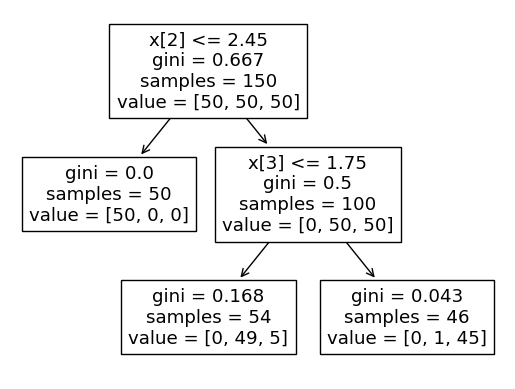

In [ ]:


from sklearn.tree import plot_tree
plot_tree(clas)



In [ ]:

import graphviz.backend as be


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

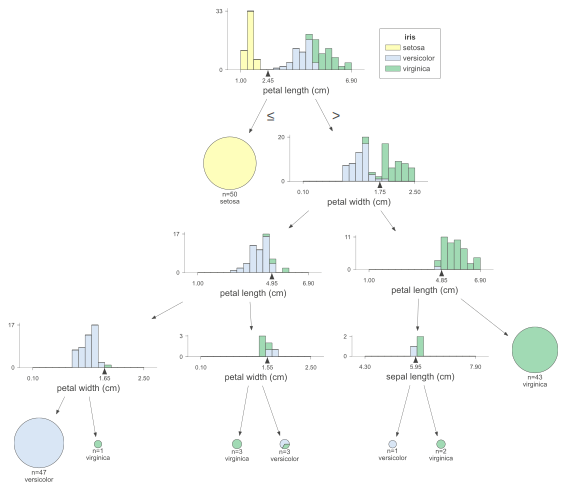

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

import dtreeviz

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=iris.feature_names,
                           target_name='iris',
                           class_names=iris.target_names)

v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window
v.save("/tmp/iris.svg")  # optionally save as svg



viz_model.view()       # in notebook, displays inline